In [1]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [2]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 4)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)
new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]
baryon_color = new_color[2]

workload_list = ['505', '520', 'pr.twitter', 'resnet50', 'ycsb.a', 'Geomean']
workload_dict = {
    '505.mcf_r': '505',
    '520.omnetpp_r': '520',
    'pr.twitter': 'pr.twi',
    'resnet50': 'resnet50',
    'ycsb.a': 'YCSB-A',
    'Geomean': 'Geomean',
}

fig_name = 'graph_sensitivity'

In [3]:
csv_path = './3_sensitivity/subblk_repl.csv'
scheme_list = ['Sub-block-level', 'Baryon']
repl_scheme_dict = {
    'Sub-block-level': 'Sub-block Replacement Only',
    # 'Threshold': 'Threshold-based Replacement',
    'Baryon': 'Two-level Replacement (Baryon)',
}

repl_title = 'Norm. Performance'
repl_name = 'graph_subblkrepl_superblksize'
repl_ylim = (0, 1.25)
repl_yticks = list(np.arange(repl_ylim[0], repl_ylim[1]+0.01, 0.25))
repl_bar_colors = easypyplot.color.color_scale(baryon_color, len(repl_scheme_dict), low=0.7, high=1.0)
# repl_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 5, 0]]
assert len(repl_bar_colors) == len(repl_scheme_dict)

''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
repl_xlabels = []
repl_xticks = []
repl_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in repl_scheme_dict):
                row_value.append(row[col])
        repl_data_2darr.append(row_value)
        repl_xlabels.append(workload_dict[workload_fullname])
        xtick += 1
        repl_xticks.append(xtick)
assert len(repl_data_2darr) == len(repl_xlabels) == len(repl_xticks)

pprint(repl_data_2darr)

[[0.67, 1.0], [0.46, 1.0], [0.69, 1.0], [0.99, 1.0], [0.63, 1.0], [0.7534, 1.0]]


In [4]:
''' sbsize '''
sbsize_csv_path = './3_sensitivity/superblksize.csv'
sbsize_scheme_list = ['1 Performance', '2 Performance', '4 Performance', '8 Performance', '12 Performance', '16 Performance']
sbsize_scheme_dict = {
    '1 Performance': '1',
    # '2 Performance': '2',
    '4 Performance': '4',
    '8 Performance': '8 (Baryon)',
    '12 Performance': '12',
    '16 Performance': '16',
}

sbsize_title = 'Norm. Performance'
sbsize_name = 'graph_superblksize'
sbsize_ylim = (0, 1.25)
sbsize_yticks = list(np.arange(sbsize_ylim[0], sbsize_ylim[1]+0.01, 0.25))

sbsize_bar_colors = easypyplot.color.color_scale(baryon_color, len(sbsize_scheme_dict), low=0.7, high=1.0)
assert len(sbsize_bar_colors) == len(sbsize_scheme_dict)

''' SBSize: Load data from file. '''
csv_hd = pd.read_csv(sbsize_csv_path, sep=',')
sbsize_xlabels = []
sbsize_xticks = []
sbsize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in sbsize_scheme_dict):
                row_value.append(row[col])
        sbsize_data_2darr.append(row_value)
        sbsize_xlabels.append(workload_dict[workload_fullname])
        xtick += 1
        sbsize_xticks.append(xtick)
assert len(sbsize_data_2darr) == len(sbsize_xlabels) == len(sbsize_xticks)

pprint(sbsize_data_2darr)

[[0.84, 1.0, 1.0, 0.83, 0.52],
 [0.29, 0.78, 1.0, 1.06, 0.88],
 [0.48, 0.96, 1.0, 1.11, 0.99],
 [0.98, 1.02, 1.0, 0.91, 0.86],
 [0.69, 0.63, 1.0, 0.9, 0.47],
 [0.8597, 0.9819, 1.0, 0.9482, 0.8191]]


In [5]:
''' Stage Size: Load data from file. '''
csv_path = './3_sensitivity/stagesize.csv'
stagesize_scheme_dict = {
    'No Stage Area Performance': 'No Stage Area',
    '8MB Performance': '8MB',
    '16MB Performance': '16MB',
    '32MB Performance': '32MB',
    '64MB Performance': '64MB (Baryon)',
    '128MB Performance': '128MB'
    }

stagesize_title = 'Norm. Performance'
fig_name = 'graph_sensitivity'
stagesize_ylim = (0, 1.25)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.25))
stagesize_bar_colors = easypyplot.color.color_scale(baryon_color, len(stagesize_scheme_dict), low=0.7, high=1.0)
# stagesize_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 5, 0]] +  ['#beaed4']
assert len(stagesize_bar_colors) == len(stagesize_scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in stagesize_scheme_dict):
                row_value.append(row[col])
        stagesize_data_2darr.append(row_value)
        stagesize_xlabels.append(workload_dict[workload_fullname])
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

''' Layout hit rate '''
layout_scheme_list = ['32MB Layout', '64MB Layout', '128MB Layout']
layout_scheme_dict = {
    '32MB Layout': '32 MB Layout Hit Rate',
    '64MB Layout': 'Baryon 64 MB Layout Hit Rate',
    '128MB Layout': '128 MB Layout Hit Rate'
}
csv_hd = pd.read_csv(csv_path, sep=',')
layout_xlabels = []
layout_xticks = []
layout_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in layout_scheme_dict):
                row_value.append(row[col])
        layout_data_2darr.append(row_value)
        layout_xlabels.append(workload_fullname)
        xtick += 1
        layout_xticks.append(xtick)
assert len(layout_data_2darr) == len(layout_xlabels) == len(layout_xticks)

pprint(layout_data_2darr)

[[0.6759, 0.97, 0.97, 0.98, 1.0, 1.02],
 [0.52, 0.76, 0.8, 0.83, 1.0, 1.06],
 [0.583, 0.87, 0.9, 0.94, 1.0, 1.01],
 [0.8996, 1.0, 1.0, 1.0, 1.0, 1.0],
 [nan, 0.53, 0.78, 0.84, 1.0, 1.03],
 [0.6554, 0.8972, 0.9221, 0.9423, 1.0, 1.0624]]
[[], [], [], [], [], []]


In [6]:
''' Commit Policy: Load data from file. '''
csv_path = './3_sensitivity/deltacommit.csv'
scheme_list = ['0', '1', '2', '4', 'inf', 'allCommit']
commit_scheme_dict = {
    item: item for item in scheme_list
    }
commit_scheme_dict['4'] = '4 (Baryon)'
commit_scheme_dict['allCommit'] = '100% commit'

commit_title = 'Norm. Performance'
commit_ylim = (0, 1.25)
commit_yticks = list(np.arange(commit_ylim[0], commit_ylim[1]+0.01, 0.25))
commit_bar_colors = easypyplot.color.color_scale(baryon_color, len(commit_scheme_dict), low=0.7, high=1.0)
# commit_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 5, 0]] +  ['#beaed4']
assert len(commit_bar_colors) == len(commit_scheme_dict)

# pprint(commit_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
commit_xlabels = []
commit_xticks = []
commit_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in commit_scheme_dict):
                row_value.append(row[col])
        commit_data_2darr.append(row_value)
        commit_xlabels.append(workload_dict[workload_fullname])
        xtick += 1
        commit_xticks.append(xtick)
assert len(commit_data_2darr) == len(commit_xlabels) == len(commit_xticks)

pprint(commit_data_2darr)

[[0.6114, 0.8869, 0.9627, 1.0, 0.9821, 0.9],
 [0.9696, 0.9955, 1.0, 1.0, 0.8956, 0.94],
 [0.8354, 1.0014, 1.0024, 1.0, 0.938, 0.58],
 [0.9682, 0.9684, 1.0028, 1.0, 1.0034, 0.96],
 [0.8231, 0.7454, 0.8764, 1.0125, 0.8347, 1.03],
 [0.9347, 0.929, 0.9566, 1.0, 0.9766, nan]]


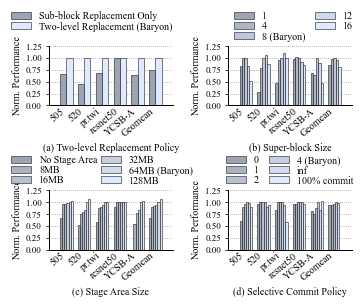

In [7]:
''' Two-level Repl: Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
repl_ax = fig.add_subplot(2, 2, 1)
easypyplot.format.turn_off_box(repl_ax)
repl_h = easypyplot.barchart.draw(
    repl_ax, repl_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=repl_xlabels,
    xticks=repl_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40,
    colors=repl_bar_colors)
''' x axis '''
repl_ax.xaxis.set_tick_params(pad=-3)
repl_ax.set_xlim([repl_ax.get_xticks()[0] - 1, repl_ax.get_xticks()[-1] + 1])
repl_ax.set_xticks(repl_xticks)
repl_ax.set_xticklabels(repl_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
repl_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# repl_ax.tick_params(direction='in') # [in, out, inout]
# repl_ax.set_xlabel(repl_title)
''' y axis '''
repl_ax.yaxis.grid(True)
repl_ax.set_ylim(repl_ylim)
repl_ax.set_yticks(repl_yticks)
repl_ax.set_ylabel(repl_title, multialignment='center', fontproperties=ft)
repl_ax.set_xlabel('(a) Two-level Replacement Policy', fontproperties=ft)
''' legend '''
legend = [repl_scheme_dict[item] for item in repl_scheme_dict]
fig.legend(repl_h, legend, loc='upper left', bbox_to_anchor=(0, 1.11),
        ncol=1, frameon=False, prop=ft, columnspacing=0.3, labelspacing=0)

''' sbsize plot '''
sbsize_ax = fig.add_subplot(2, 2, 2)
easypyplot.format.turn_off_box(sbsize_ax)
sbzsize_h = easypyplot.barchart.draw(
    sbsize_ax, sbsize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=sbsize_xlabels,
    xticks=sbsize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40,
    colors=sbsize_bar_colors)
''' x axis '''
sbsize_ax.xaxis.set_tick_params(pad=-3)
sbsize_ax.set_xlim([sbsize_ax.get_xticks()[0] - 1, sbsize_ax.get_xticks()[-1] + 1])
sbsize_ax.set_xticks(sbsize_xticks)
sbsize_ax.set_xticklabels(sbsize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
sbsize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# repl_ax.tick_params(direction='in') # [in, out, inout]
''' y axis '''
sbsize_ax.yaxis.grid(True)
sbsize_ax.set_ylim(sbsize_ylim)
sbsize_ax.set_yticks(sbsize_yticks)
sbsize_ax.set_ylabel('Norm. Performance', multialignment='center', fontproperties=ft)
sbsize_ax.set_xlabel('(b) Super-block Size', fontproperties=ft)
''' legend '''
sbsize_legend = [sbsize_scheme_dict[item] for item in sbsize_scheme_dict]
fig.legend(sbzsize_h, sbsize_legend, loc='upper right', bbox_to_anchor=(1, 1.11),
        ncol=2, frameon=False, prop=ft, columnspacing=1, labelspacing=0)


''' stage size plot '''
stagesize_ax = fig.add_subplot(2, 2, 3)
# stagesize_ax2 = stagesize_ax.twinx()
easypyplot.format.turn_off_box(stagesize_ax)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40,
    colors=stagesize_bar_colors)
# stagesize_h2 = []
# # easypyplot.format.turn_off_box(ax2)
# for group_id in range(len(workload_dict)):
#     # layout_xticks = list(np.arange(fig_xticks[group_id] - 1/3))
#     gap = 1./3 - 1.0 * fig_bar_width / 6
#     layout_xticks = [stagesize_xticks[group_id] - gap, stagesize_xticks[group_id], stagesize_xticks[group_id] + gap]
#     print(layout_xticks)
#     stagesize_h2 += stagesize_ax2.plot(layout_xticks, layout_data_2darr[group_id],
#                 marker='*',
#                 linewidth = '1.0',
#                 color = '#000000',
#                 markersize = '7.0',
#                 # prop = ft
#                 )
''' x axis '''
stagesize_ax.xaxis.set_tick_params(pad=-3)
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('(c) Stage Area Size', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim(stagesize_ylim)
stagesize_ax.set_yticks(stagesize_yticks)
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
# stagesize_ax2.set_ylim([0., 1.])
# stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
legend = [stagesize_scheme_dict[item] for item in stagesize_scheme_dict]
fig.legend(stagesize_h, legend, loc='upper left', bbox_to_anchor=(0, 0.61),
        ncol=2, frameon=False, prop=ft, columnspacing=0.3, labelspacing=0)

''' commit plot '''
commit_ax = fig.add_subplot(2, 2, 4)
easypyplot.format.turn_off_box(commit_ax)
sbzsize_h = easypyplot.barchart.draw(
    commit_ax, commit_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=commit_xlabels,
    xticks=commit_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40,
    colors=commit_bar_colors)
''' x axis '''
commit_ax.xaxis.set_tick_params(pad=-3)
commit_ax.set_xlim([commit_ax.get_xticks()[0] - 1, commit_ax.get_xticks()[-1] + 1])
commit_ax.set_xticks(commit_xticks)
commit_ax.set_xticklabels(commit_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
commit_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# repl_ax.tick_params(direction='in') # [in, out, inout]
''' y axis '''
commit_ax.yaxis.grid(True)
commit_ax.set_ylim(commit_ylim)
commit_ax.set_yticks(commit_yticks)
commit_ax.set_ylabel('Norm. Performance', multialignment='center', fontproperties=ft)
commit_ax.set_xlabel('(d) Selective Commit Policy', fontproperties=ft)
''' legend '''
commit_legend = [commit_scheme_dict[item] for item in commit_scheme_dict]
fig.legend(sbzsize_h, commit_legend, loc='upper right', bbox_to_anchor=(1, 0.61),
        ncol=2, frameon=False, prop=ft, columnspacing=1, labelspacing=0)


''' last resize '''
plt.tight_layout(w_pad=2, h_pad=2.2)
easypyplot.format.resize_ax_box(repl_ax, hratio=0.8)
easypyplot.format.resize_ax_box(sbsize_ax, hratio=0.8)
easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)
easypyplot.format.resize_ax_box(commit_ax, hratio=0.8)


In [8]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures